# 판매 분석

In [47]:
!pip install pymysql > /dev/null
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

������ ��θ� ã�� �� �����ϴ�.
������ ��θ� ã�� �� �����ϴ�.
������ ��θ� ã�� �� �����ϴ�.
������ ��θ� ã�� �� �����ϴ�.


In [48]:
import json
with open('mysql.json') as fp:
    config_str = fp.read()
config = json.loads(config_str)

In [70]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

In [76]:
import db_module as dm

## 1. 월별 매출/이익

In [57]:
results = dm.get_monthly_data(config)
df = pd.DataFrame(results, columns=['월','매출','이익'])
df.set_index('월', inplace=True)
df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)
df

OperationalError: (1055, "Expression #1 of SELECT list is not in GROUP BY clause and contains nonaggregated column 'sales_book.sdate' which is not functionally dependent on columns in GROUP BY clause; this is incompatible with sql_mode=only_full_group_by")

## 2. 거래처별 매출/이익

In [58]:
# 소수점 자리 제한을 위한 코드
pd.options.display.float_format = '{:.2}'.format

In [79]:
results = dm.get_data_by_company(config)
df = pd.DataFrame(results, columns=['판매처','매출','이익'])
df.set_index('판매처', inplace=True)
df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)
df['이익률'] = df.이익 / df.매출 * 100
df

,매출,이익,이익률
판매처,,,
테크브루,15911800,1104010,6.9
한경아카데미,15185000,1363590,9.0
표준협회,13709100,872960,6.4
생산성본부,11230300,807120,7.2
멀티캠퍼스,8687700,652990,7.5


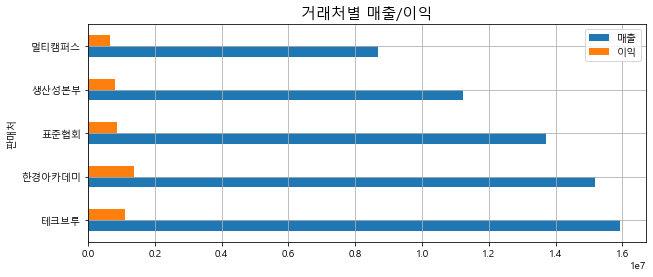

In [60]:
df[['매출','이익']].plot.barh(rot=0, figsize=(10,4))
plt.title('거래처별 매출/이익', size=15)
plt.grid()
plt.show()

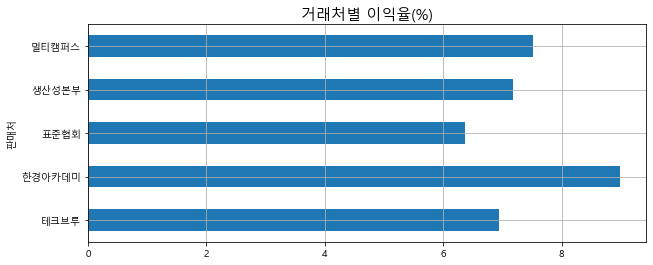

In [61]:
df['이익률'].plot.barh(rot=0, figsize=(10,4))
plt.title('거래처별 이익율(%)', size= 15)
plt.grid()
plt.show()

## 3. 거래처별 판매상품 및 수량

In [82]:
results = dm.get_products_by_company(config)
df = pd.DataFrame(results, columns=['판매처','상품','수량'])
df.set_index(['판매처','상품'], inplace=True)
df['수량'] = df.수량.astype(int)
df

NameError: name 'results' is not defined

## 4. 제품별 판매수량/매출/이익

In [81]:
results = dm.get_data_by_products(config)
df = pd.DataFrame(results, columns=['상품','수량','매출','이익'])
df.set_index('상품', inplace = True)
df['수량'] = df.수량.astype(int)
df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)
df

,수량,매출,이익
상품,,,
텐트,48,4555200,683520
타프,28,2410800,337400
천막,9,710100,28440
침낭,64,4224000,464640
매트,79,1200800,83740
랜턴,68,6432800,321640
취사용품,12,693600,97080
아이스박스,67,2036800,121940
보조배터리,52,3900000,312000


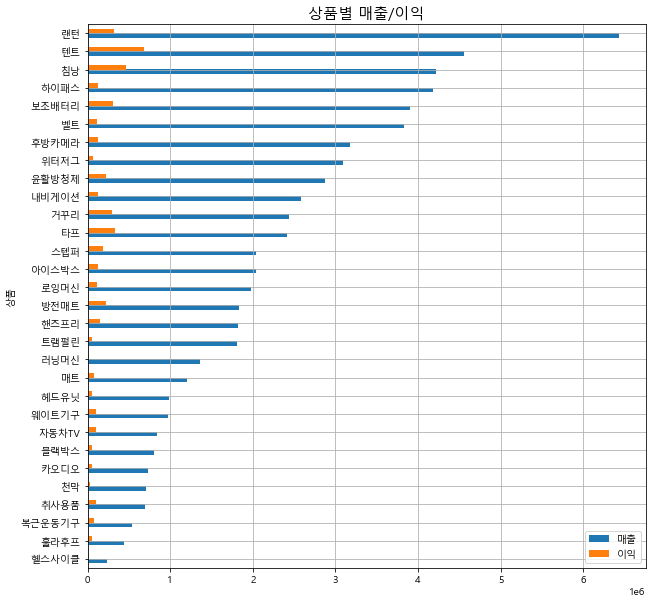

In [83]:
df[['매출','이익']].sort_values(by='매출').plot.barh(rot=0, figsize=(10,10))
plt.title('상품별 매출/이익', size=15)
plt.grid()
plt.show()

## 5. 카테고리별 매출/이익

In [84]:
results = dm.get_data_by_category(config)
df = pd.DataFrame(results, columns=['카테고리','매출','이익'])
df.set_index('카테고리', inplace=True)
df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)
df['이익율'] = df.이익 / df.매출 * 100
df

,매출,이익,이익율
카테고리,,,
캠핑용품,29251400,2512310,8.6
자동차용품,19830700,1241490,6.3
헬스용품,15641800,1046870,6.7


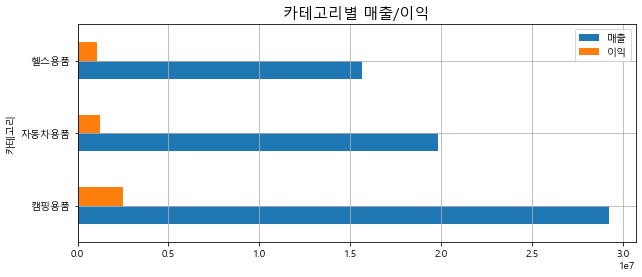

In [85]:
df[['매출','이익']].plot.barh(rot=0, figsize=(10,4))
plt.title('카테고리별 매출/이익', size=15)
plt.grid()
plt.show()

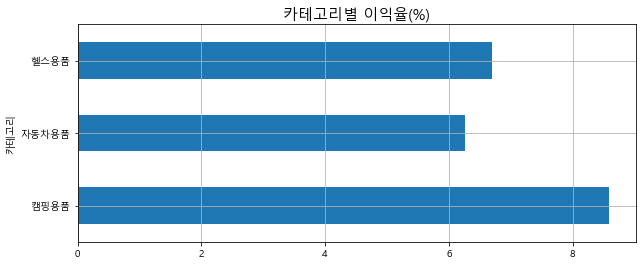

In [86]:
df['이익율'].plot.barh(rot=0, figsize=(10,4))
plt.title('카테고리별 이익율(%)', size=15)
plt.grid()
plt.show()